In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
df.shape

(1338, 7)

In [7]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


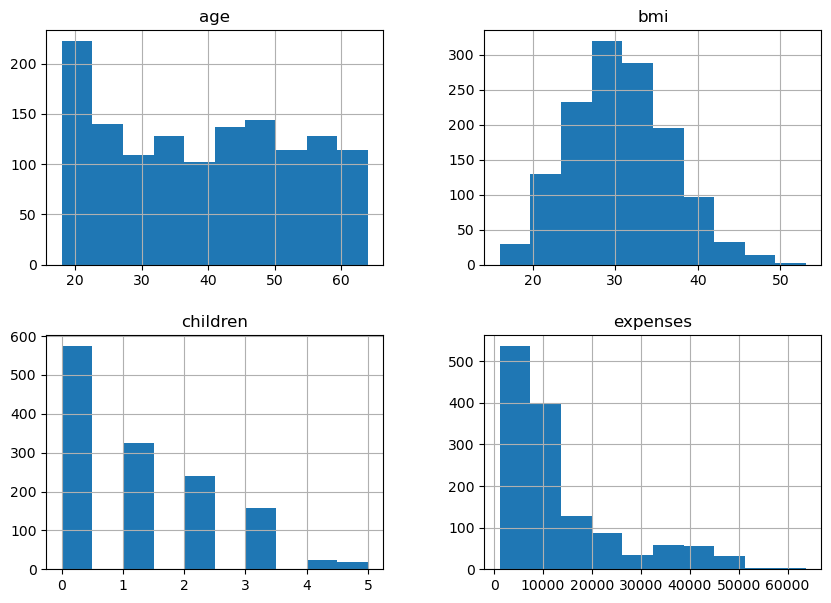

In [10]:
df.hist(figsize=(10,7))
plt.show()

In [11]:
df_cat = df.select_dtypes(include='object')
df_cat.columns

Index(['sex', 'smoker', 'region'], dtype='object')

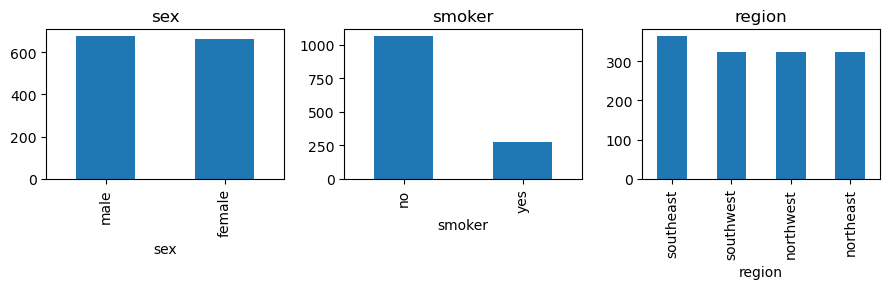

In [12]:
for i, column in enumerate(df_cat.columns):
    plt.subplot(1,3,i+1)
    df_cat[column].value_counts().plot(kind='bar', title=column)
plt.gcf().set_size_inches(9, 3)
plt.tight_layout()
plt.show()

### Encoding Features

#### Encoding Data with One Hot Encoding

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [14]:
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi', 'children']

# Create transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(columns=['expenses'])
y = df['expenses']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [18]:
X_train.shape, X_test.shape

((1070, 6), (268, 6))

### Model Training

#### Linear Models

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [20]:
# Linear Regression
linear_model = LinearRegression()
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', linear_model)])
linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_pipeline.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear}")



Linear Regression MSE: 35478025.80263243


In [21]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', ridge_model)])
ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge}")



Ridge Regression MSE: 35498505.53009342


In [22]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', lasso_model)])
lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso}")



Lasso Regression MSE: 35479763.12236722


In [23]:
# ElasticNet Regression
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', elasticnet_model)])
elasticnet_pipeline.fit(X_train, y_train)
y_pred_elasticnet = elasticnet_pipeline.predict(X_test)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
print(f"ElasticNet Regression MSE: {mse_elasticnet}")


ElasticNet Regression MSE: 91644798.82253236


In [24]:
# Support Vector Regressor (SVR)
svr_model = SVR(kernel='linear')
svr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', svr_model)])
svr_pipeline.fit(X_train, y_train)
y_pred_svr = svr_pipeline.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"SVR MSE: {mse_svr}")



SVR MSE: 163339264.67908403


In [25]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', dt_model)])
dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree Regression MSE: {mse_dt}")



Decision Tree Regression MSE: 39939287.79857687


In [26]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', rf_model)])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Regression MSE: {mse_rf}")



Random Forest Regression MSE: 22371770.147533


In [27]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', gb_model)])
gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting Regression MSE: {mse_gb}")



Gradient Boosting Regression MSE: 18096581.17002376


In [28]:
# XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', xgb_model)])
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost Regression MSE: {mse_xgb}")

XGBoost Regression MSE: 27659850.995154843


In [29]:
regressors = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    ElasticNet(alpha=1.0, l1_ratio=0.5),
    KNeighborsRegressor(n_neighbors=3),
    SVR(kernel='linear'),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    XGBRegressor(random_state=42)
]

In [30]:
# Dictionary to store MSE for each model
mse_scores = {}

# Evaluate each model
for regressor in regressors:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', regressor)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[type(regressor).__name__] = mse

# Find the model with the highest MSE
worst_model = max(mse_scores, key=mse_scores.get)
worst_mse = mse_scores[worst_model]

print(f"Model with the highest MSE: {worst_model}")
print(f"Highest MSE value: {worst_mse}")

Model with the highest MSE: SVR
Highest MSE value: 163339264.67908403


In [33]:
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Example usage
logging.info('This is an info message')
logging.debug('This is a debug message')
logging.warning('This is a warning message')
logging.error('This is an error message')

2024-07-25 13:32:39,512 - INFO - This is an info message
2024-07-25 13:32:39,521 - WARNING - This is a warning message
2024-07-25 13:32:39,521 - ERROR - This is an error message


In [35]:
import pickle
with open('svr_pipeline.pkl', 'wb') as f:
    pickle.dump(svr_pipeline, f)